# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (28)

**15/04/2024**

## Aplicar un caso de uso (*Time Series Forecasting*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

En esta sesión intentaremos predecir las **[ventas mensuales de corticosteroides en Australia](https://pkg.robjhyndman.com/fpp2-package/reference/h02.html#format:~:text=Monthly%20corticosteroid%20drug%20subsidy%20in%20Australia%20from%201991%20to%202008.)**. Estos medicamentos se conocen como **fármacos H02** según el esquema de clasificación Anatómico Terapéutico Químico (_ATC_) y se utilizan principalmente por sus efectos **anti-inflamatorios** e inmunosupresores. Por ejemplo __Dexametasona__ y __Betametasona__ son algunos ejemplos de medicamentos de la clase H02.

Dascargamos la serie temporal con las ventas mensuales en **millones de dólares** en fármacos **H02** que se han recetado en el **sistema de salud Australiano** entre los años de **1991 y 2008**.

In [3]:
df = pd.read_csv('dataset_h02.csv')
df

,fecha,venta_h02
0,1992-04-01,0.379808
1,1992-05-01,0.361801
2,1992-06-01,0.410534
3,1992-07-01,0.483389
4,1992-08-01,0.475463
...,...,...
190,2008-02-01,0.761822
191,2008-03-01,0.649435
192,2008-04-01,0.827887
193,2008-05-01,0.816255


In [4]:
# Definir un rango de fechas con pasos fijos
fechas = pd.date_range(start=df['fecha'].values[0], end=df['fecha'].values[-1], freq='MS')

# Asignar a las fechas como los índices del DataFrame
df.set_index(fechas, inplace=True)

# Quitar la columna 'fecha' de la tabla
df.drop(columns='fecha', inplace=True)

df

,venta_h02
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887
2008-05-01,0.816255


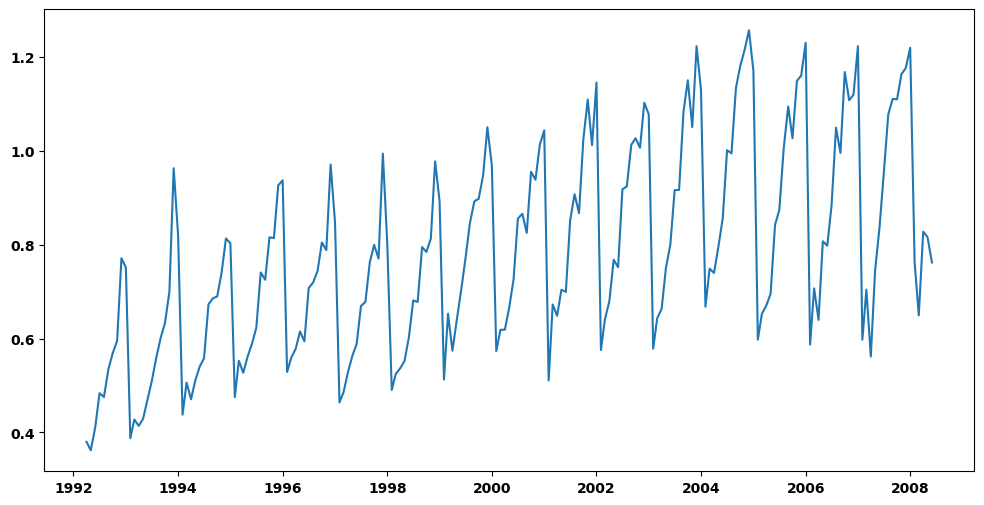

In [5]:
# Visualizamos los datos preparados
plt.plot(df)
plt.show()

In [6]:
# Las gráficas interactivas ayudan bastante a los analistas de datos, sobre todo a la hora de analizar y explorar las series temporales
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['venta_h02'],
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas mensuales de corticosteroides (H02) en Australia",
                  title_font_size=26,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de dólares (A$)'
                  )

fig.show()

---

### **`Ejercicio 28.1`**

**`28.1.1`** Aplica una descomposición de la serie temporal mediante el método `STL` y visualiza los componentes correspondientes. Describe la tendencia y la estacionalidad si son presentes en la serie temporal. 

**`28.1.2`** Saca la gráfica de ***correlograma*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica: 

 - `lags=60`

**`28.1.3`** Saca la gráfica de ***Autocorrelación parcial*** para la serie temporal, considerando el método con los retrasos indicados y analiza los patrones que ves presente en esta gráfica: 

 - `lags=48`
 - `method='ywm'`

**`28.1.4`** Saca la gráfica de las ***Características estadísticas*** (std y media) y su evolución a lo largo de tiempo de **la serie temporal**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos: 

 - `win = 12`

In [7]:
# STL
# Descomponer la serie y graficarla
from statsmodels.tsa.seasonal import STL
df_stl = STL(df['venta_h02']).fit()

display(df_stl.trend[100:105])
display(df_stl.seasonal[100:105])


2000-08-01    0.805707
2000-09-01    0.807376
2000-10-01    0.809212
2000-11-01    0.811105
2000-12-01    0.812849
Freq: MS, Name: trend, dtype: float64

2000-08-01    0.051856
2000-09-01    0.059056
2000-10-01    0.135107
2000-11-01    0.162452
2000-12-01    0.208360
Freq: MS, Name: season, dtype: float64

### Tendencia
Este aumento constante sugiere que hay un factor subyacente que impulsa gradualmente las ventas hacia arriba durante este período.

### Estacionalidad
Estos valores crecientes hacia fin de año podrían reflejar una demanda estacionalmente más alta, que es común el frío y por lo tanto se dispara la venta de estos productos.

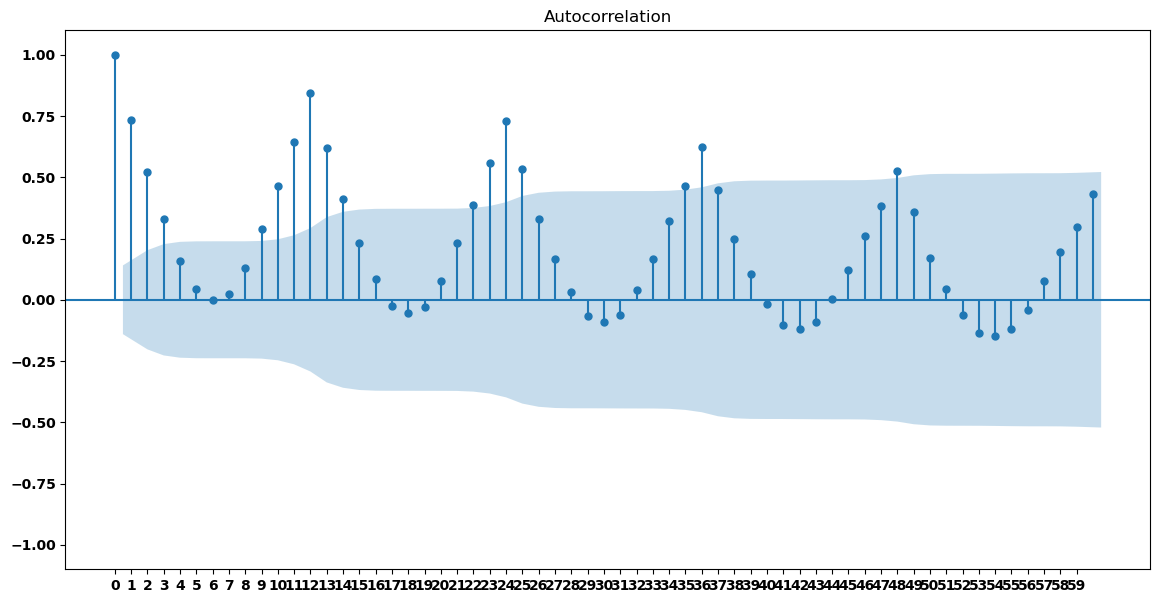

In [8]:
# Correlograma
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df, lags=60)
plt.xticks(np.arange(60))
plt.ylim(-1.1,1.1)
plt.show()

La función de autocorrelación muestra picos significativos a intervalos regulares, lo que indica estacionalidad en la serie temporal, y la lenta disminución de los picos sugiere una tendencia no estacionaria.

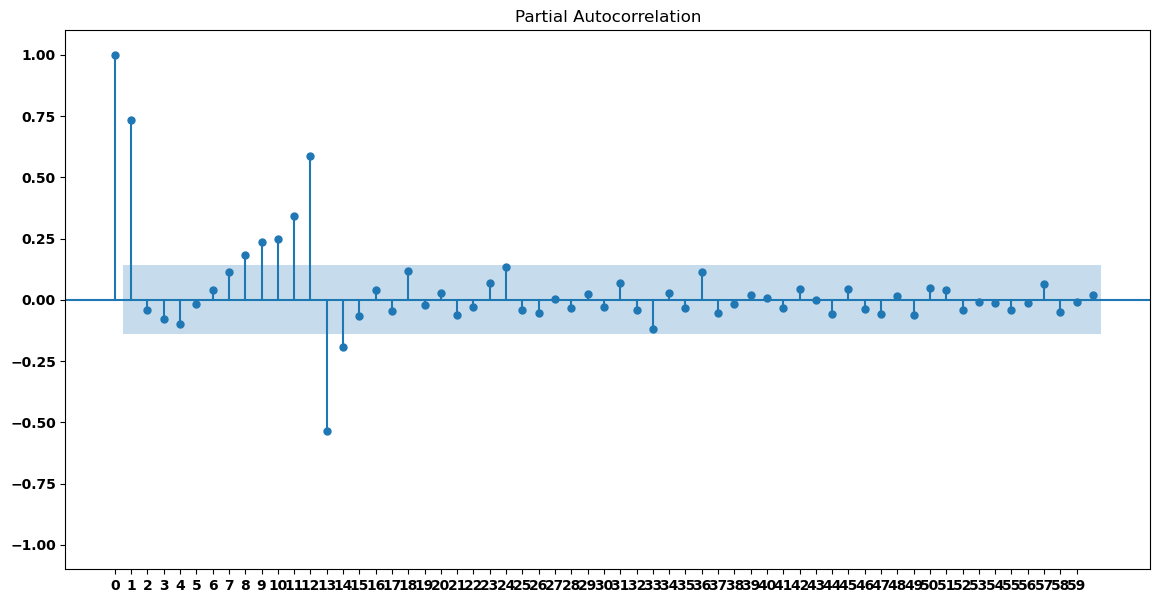

In [9]:
# Autocorrelacion parcial
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df, lags=60, method='ywm')
plt.xticks(np.arange(60))
plt.ylim(-1.1,1.1)
plt.show()

La gráfica de autocorrelación parcial muestra un solo pico significativo al inicio, seguido por valores que caen mayormente dentro del intervalo de confianza, lo que sugiere una correlación importante solo en el primer desfase.

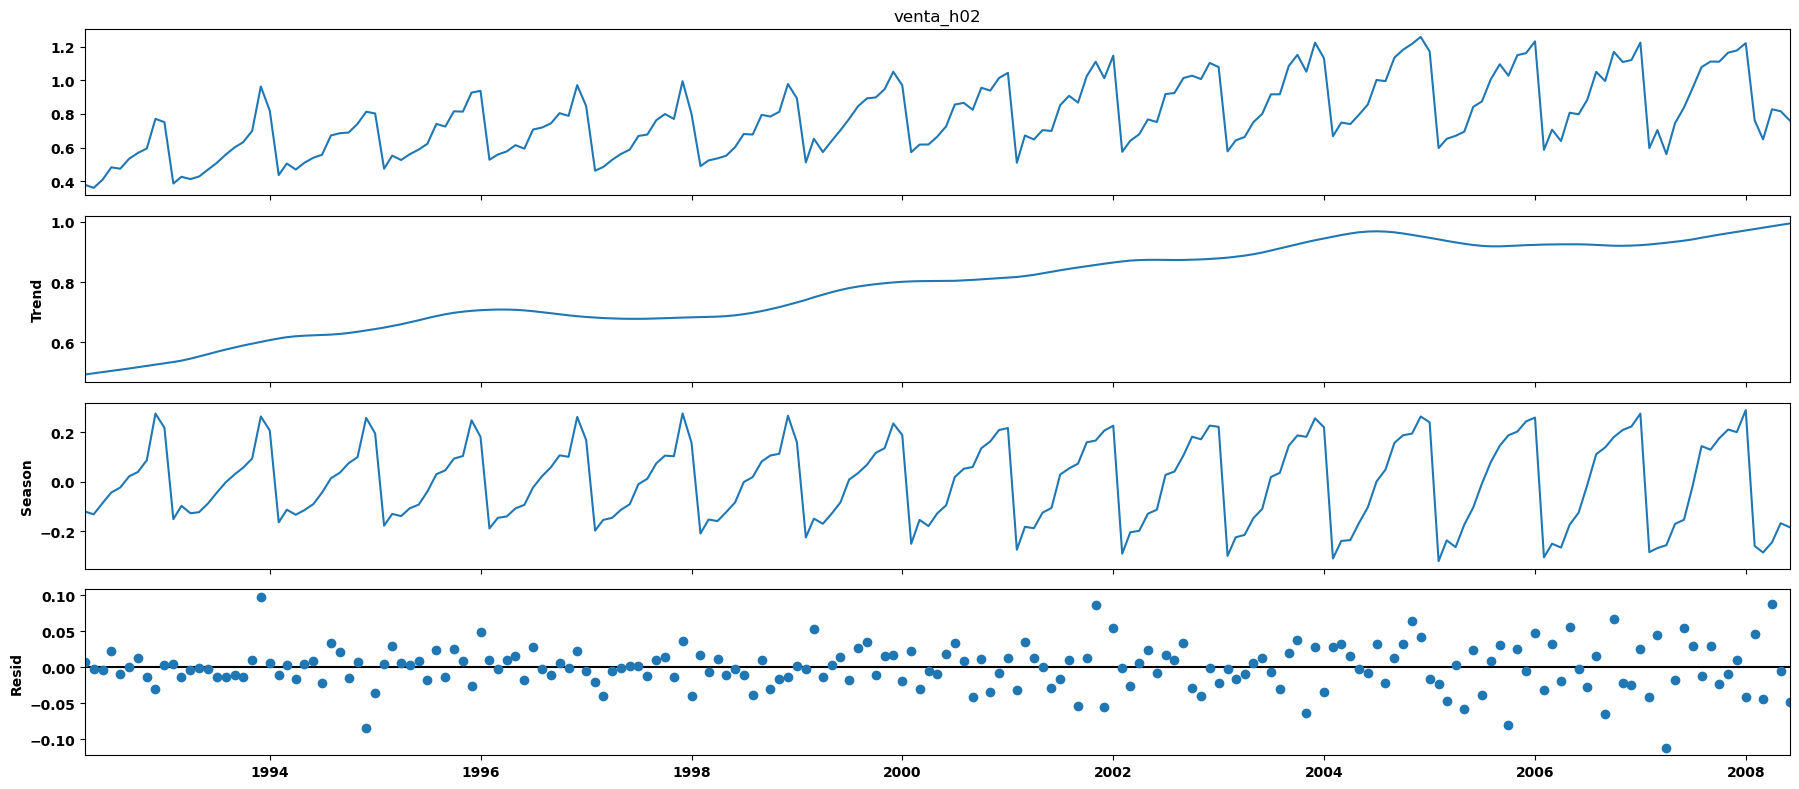

In [10]:
# Establecer el tamaño de la imégen
rcParams['figure.figsize'] = 18, 8

# Graficar la descomposición de la serie temporal
df_stl.plot()
plt.show()

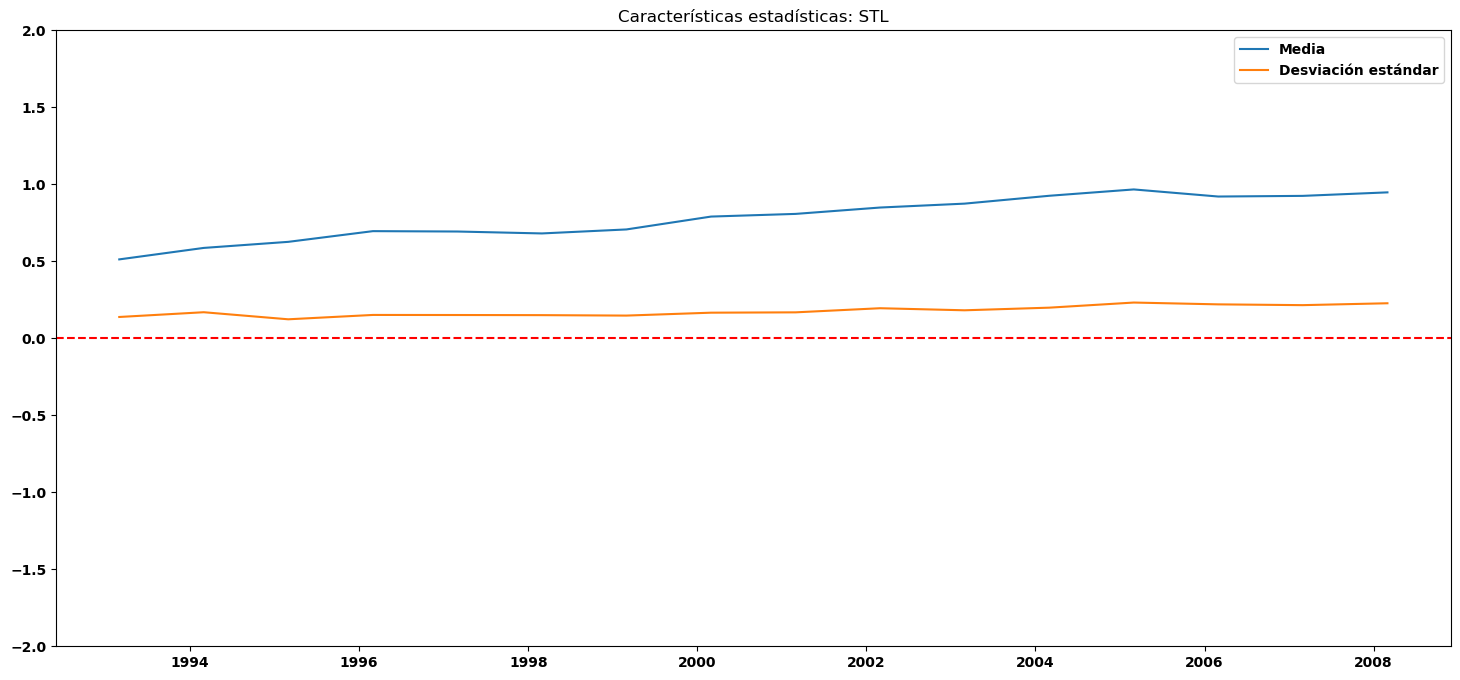

In [11]:
win = 12
stl_media = df.rolling(win).mean().iloc[win-1::win]
stl_std = df.rolling(win).std().iloc[win-1::win]
plt.plot(stl_media, label='Media')
plt.plot(stl_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: STL")
plt.legend()
plt.ylim(-2,2)
plt.show()

La gráfica muestra una media constante y una desviación estándar estable a lo largo del tiempo, lo que indica una serie con variabilidad constante y con tendencia hacia arriba.

---

### **`Ejercicio 28.2`**

Vamos a intentar a modelar la serie temporal con el objetivo de **predecir los valores mensuales del último año**. 

**`28.2.1`** Aplica el método de `Seasonal Naïve` a la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Grafica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.2.2`** Aplica el método estadístico de `Autoregresión - AR` considerando el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Después consigue estos puntos **y analiza los resultados obtenidos**:
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráficas de análisis del componente residual (curvas de diagnóstico, correlaciones con otras variables)
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción de este modelo con **sus intervalos de confianza** y los valores reales del último año. 
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.2.3`** Aplica el modelo de `SARIMA` para la serie temporal, utilizando el método de **`auto_arima`** según la búsqueda indicada considerando la estacionalidad de la serie. Después consigue estos puntos **y analiza los resultados obtenidos**:
- `start_p=1`
- `start_q=0`
- `start_P=1`
- `random_state=120`
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.


In [12]:
horizonte = 12
df_test = df.tail(horizonte)
df_test

,venta_h02
2007-07-01,0.954144
2007-08-01,1.078219
2007-09-01,1.110982
2007-10-01,1.109979
2007-11-01,1.163534
2007-12-01,1.176589
2008-01-01,1.219941
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887


In [13]:
df_train = df.loc[~df.index.isin(df_test.index)]
df_train

,venta_h02
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2007-02-01,0.597753
2007-03-01,0.704398
2007-04-01,0.561760
2007-05-01,0.745258


In [14]:
# Seasonal Naïve
pred_sn = pd.DataFrame(data=df_train.tail(12).values, index=df_test.index, columns=['pred'])
pred_sn

,pred
2007-07-01,0.884312
2007-08-01,1.049648
2007-09-01,0.995709
2007-10-01,1.168253
2007-11-01,1.108038
2007-12-01,1.120053
2008-01-01,1.223319
2008-02-01,0.597753
2008-03-01,0.704398
2008-04-01,0.561760


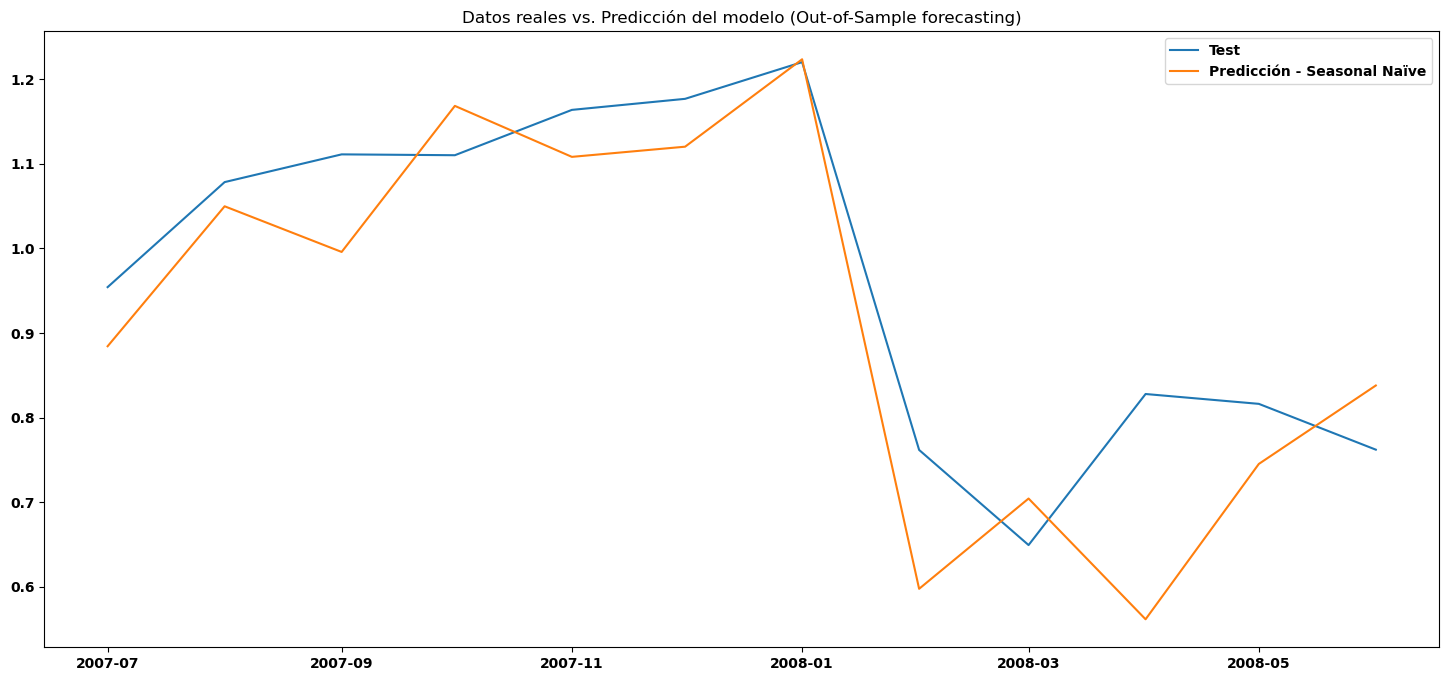

In [15]:
plt.plot(df_test, label='Test')
plt.plot(pred_sn, label='Predicción - Seasonal Naïve')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [16]:
# Métricas de evaluación del modelo
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_sn))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, pred_sn)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_sn))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_sn)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_sn))

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 0.08494277166666668
Mean Absolute Percentage Error (MAPE): 9.686181826381263
Mean Squared Error (MSE): 0.011684411050918485
Root Mean Squared Error (RMSE): 0.10809445430232989
R^2 coefficient of determination: 0.6717644471769628


El modelo Seasonal Naive no se ajusta perfectamente a los picos y caídas de los datos reales, lo que puede indicar limitaciones al capturar patrones más complejos o cambios repentinos en la serie temporal.

In [17]:
# AutoRegression

from statsmodels.tsa.ar_model import AutoReg

modelo_ar = AutoReg(df_train, lags=48)
fit_ar = modelo_ar.fit()

In [18]:
fit_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              venta_h02   No. Observations:                  183
Model:                    AutoReg(48)   Log Likelihood                 246.028
Method:               Conditional MLE   S.D. of innovations              0.039
Date:                Thu, 18 Apr 2024   AIC                           -392.057
Time:                        00:01:10   BIC                           -246.793
Sample:                    04-01-1996   HQIC                          -333.026
                         - 06-01-2007                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0506      0.030      1.710      0.087      -0.007       0.109
venta_h02.L1     -0.0349      0.086     -0.403      0.687      -0.204       0.135
venta_h02.L2      0.4420      0.087      5.101      0.000       0.272       0.612
venta_h02.L3      0.4070      0.095      4.291      0.000       0.221       0.593
venta_h02.L4     -0.0464      0.101     -0.460      0.645      -0.244       0.151
venta_h02.L5     -0.0189      0.102     -0.186      0.853      -0.218       0.180
venta_h02.L6     -0.0014      0.101     -0.014      0.989      -0.200       0.197
venta_h02.L7      0.0753      0.101      0.745      0.456      -0.123       0.273
venta_h02.L8      0.0044      0.100      0.044      0.965      -0.192       0.201
venta_h02.L9      0.0547      0.100      0.544      0.586      -0.142       0.251
venta_h02.L10    -0.0785      0.099     -0.790      0.430      -0.273       0.116
venta_h02.L11    -0.1979      0.094     -2.099      0.036      -0.383      -0.013
venta_h02.L12     0.5287      0.096      5.498      0.000       0.340       0.717
venta_h02.L13     0.1445      0.102      1.423      0.155      -0.055       0.344
venta_h02.L14    -0.1845      0.103     -1.793      0.073      -0.386       0.017
venta_h02.L15    -0.2978      0.101     -2.938      0.003      -0.497      -0.099
venta_h02.L16     0.0130      0.100      0.130      0.896      -0.183       0.209
venta_h02.L17     0.0425      0.100      0.425      0.671      -0.154       0.239
venta_h02.L18     0.0159      0.102      0.157      0.876      -0.183       0.215
venta_h02.L19    -0.1526      0.102     -1.500      0.134      -0.352       0.047
venta_h02.L20    -0.1827      0.102     -1.790      0.073      -0.383       0.017
venta_h02.L21     0.0314      0.106      0.297      0.766      -0.176       0.238
venta_h02.L22     0.0621      0.106      0.586      0.558      -0.145       0.270
venta_h02.L23     0.3064      0.104      2.955      0.003       0.103       0.510
venta_h02.L24     0.0642      0.107      0.597      0.550      -0.146       0.275
venta_h02.L25    -0.1334      0.108     -1.236      0.217      -0.345       0.078
venta_h02.L26     0.1014      0.106      0.952      0.341      -0.107       0.310
venta_h02.L27     0.1550      0.106      1.459      0.145      -0.053       0.363
venta_h02.L28    -0.0563      0.100     -0.566      0.571      -0.251       0.139
venta_h02.L29    -0.2022      0.099     -2.037      0.042      -0.397      -0.008
venta_h02.L30    -0.1102      0.099     -1.116      0.265      -0.304       0.083
venta_h02.L31     0.0337      0.098      0.344      0.731      -0.159       0.226
venta_h02.L32     0.1788      0.100      1.787      0.074      -0.017       0.375
venta_h02.L33    -0.2030      0.101     -2.005      0.045      -0.402      -0.005
venta_h02.L34    -0.0346      0.103     -0.338      0.736      -0.236       0.166
venta_h02.L35     0.0658      0.100      0.655      0.512      -0.131       0.263
venta_h02.L36     0.3031      0.101      3.

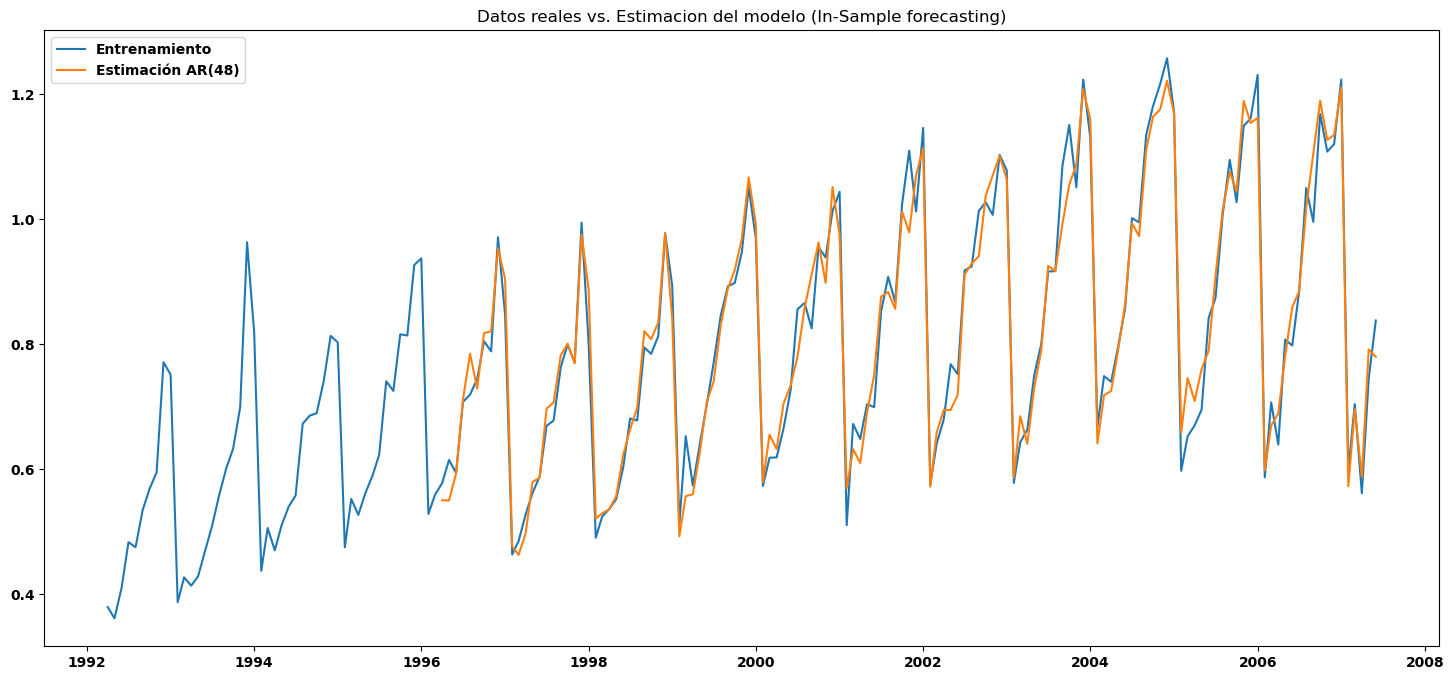

In [19]:
estim_ar = fit_ar.fittedvalues

plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_ar, label='Estimación AR(48)')
plt.title("Datos reales vs. Estimacion del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

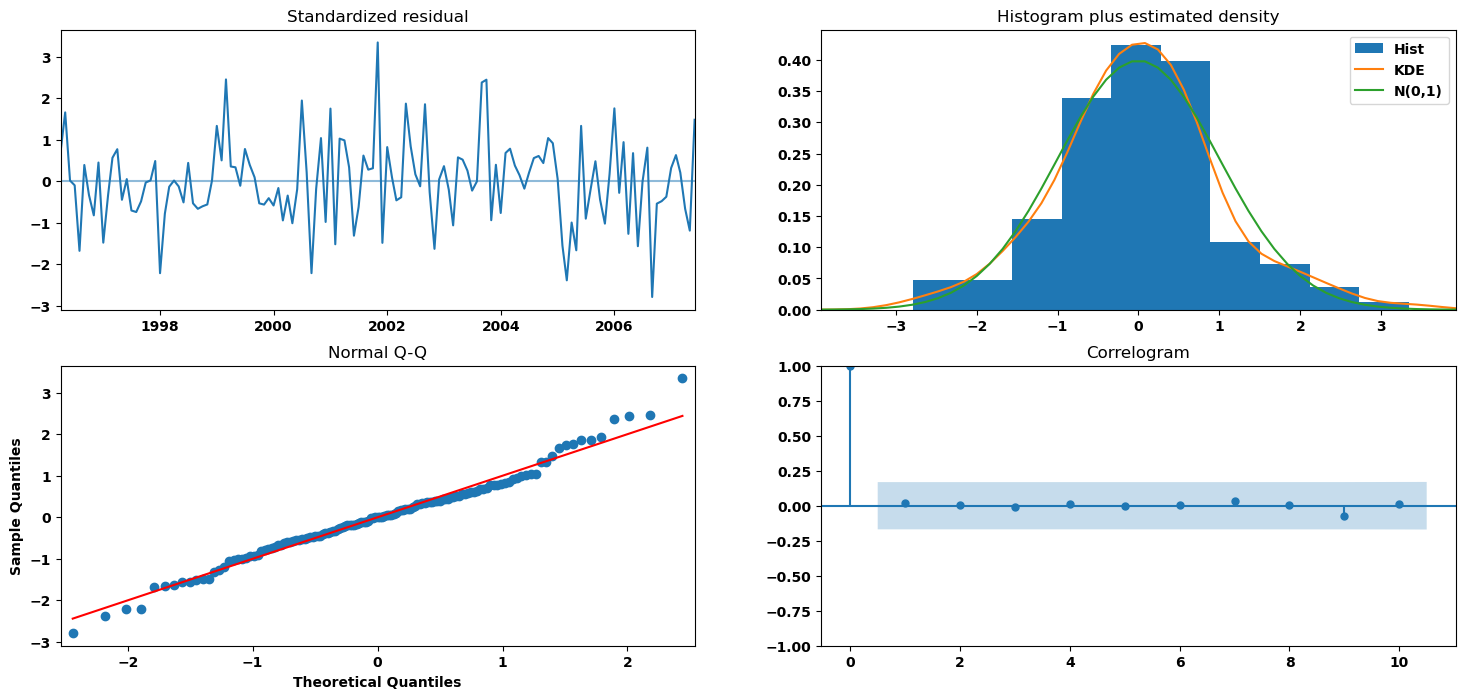

In [20]:
fit_ar.plot_diagnostics()
plt.show()

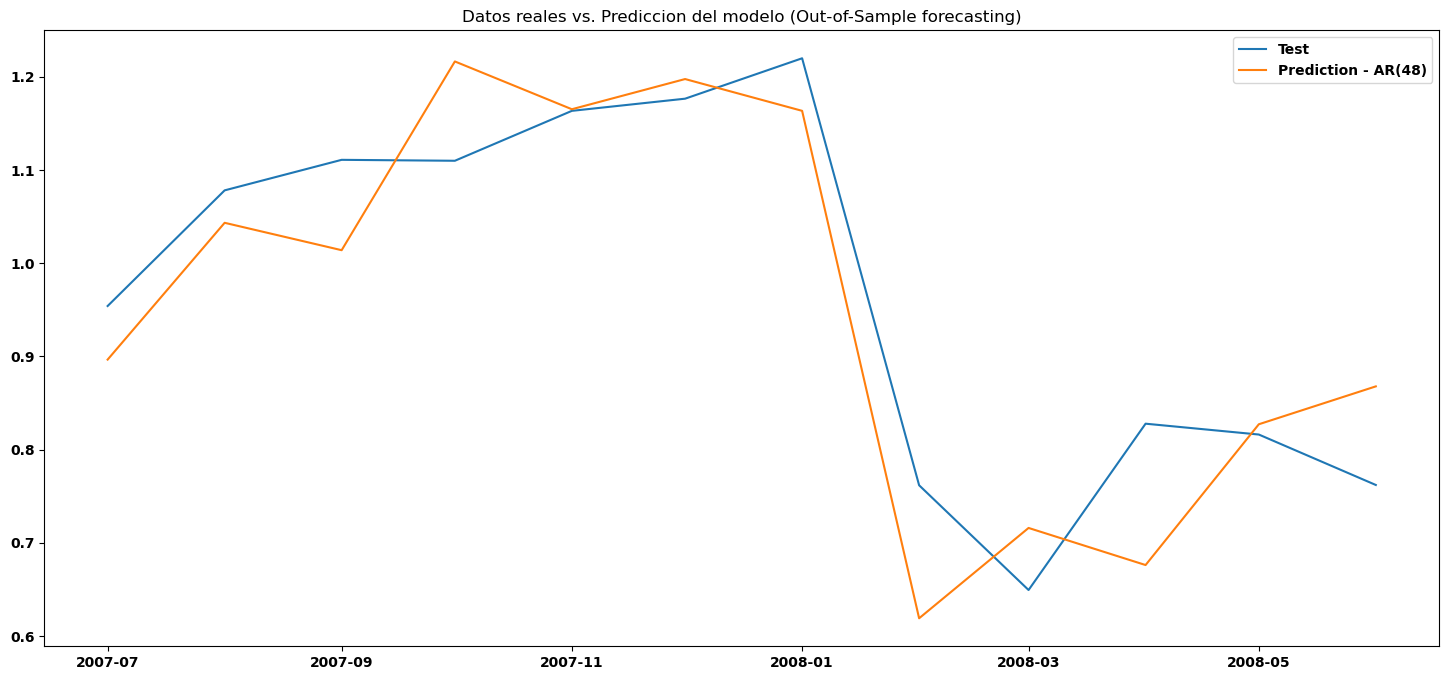

In [21]:
fit_ar.predict(start=df_test.index[0],
               end=df_test.index[-1])
pred_ar = fit_ar.forecast(steps=horizonte)

plt.plot(df_test, label='Test')
plt.plot(pred_ar, label='Prediction - AR(48)')
plt.title("Datos reales vs. Prediccion del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [22]:
pred_ar

2007-07-01    0.896650
2007-08-01    1.043430
2007-09-01    1.014030
2007-10-01    1.216538
2007-11-01    1.165268
2007-12-01    1.197656
2008-01-01    1.163550
2008-02-01    0.619112
2008-03-01    0.716028
2008-04-01    0.676230
2008-05-01    0.827267
2008-06-01    0.867919
Freq: MS, dtype: float64

In [23]:
conf_ar = fit_ar.get_prediction(start=df_test.index[0], end=df_test.index[-1]).conf_int()

conf_ar

,lower,upper
2007-07-01,0.819996,0.973305
2007-08-01,0.966729,1.120131
2007-09-01,0.930141,1.097919
2007-10-01,1.127832,1.305245
2007-11-01,1.076068,1.254468
2007-12-01,1.105040,1.290273
2008-01-01,1.069973,1.257127
2008-02-01,0.523791,0.714434
2008-03-01,0.619605,0.812451
2008-04-01,0.578082,0.774379


In [24]:
conf_ar['delta'] = conf_ar.apply(lambda x: x['upper'] - x['lower'], axis=1)
conf_ar

,lower,upper,delta
2007-07-01,0.819996,0.973305,0.153309
2007-08-01,0.966729,1.120131,0.153402
2007-09-01,0.930141,1.097919,0.167778
2007-10-01,1.127832,1.305245,0.177414
2007-11-01,1.076068,1.254468,0.178400
2007-12-01,1.105040,1.290273,0.185233
2008-01-01,1.069973,1.257127,0.187154
2008-02-01,0.523791,0.714434,0.190644
2008-03-01,0.619605,0.812451,0.192846
2008-04-01,0.578082,0.774379,0.196297


In [25]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_ar.index,
    y=pred_ar,
    name="Predicción (AR)",
    mode="markers+lines"
    ))

fig.add_trace(go.Scatter(
    x=conf_ar.index,
    y=conf_ar['lower'],
    name="lower",
    mode="lines",
    line=dict(width=0),
    showlegend=False
    ))

fig.add_trace(go.Scatter(
    x=conf_ar.index,
    y=conf_ar['upper'],
    name="upper",
    mode="lines",
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
    ))

fig.update_layout(title="Millones de $",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de $'
                  )

fig.show()

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas de evaluación del modelo
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_ar))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, pred_ar)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_ar))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_ar)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_ar))

Mean Absolute Error (MAE): 0.07106164003800404
Mean Absolute Percentage Error (MAPE): 8.056246464874196
Mean Squared Error (MSE): 0.007334059579441276
Root Mean Squared Error (RMSE): 0.0856391241164999
R^2 coefficient of determination: 0.7939734326356341


El modelo Autoregresivo (AR(48)) para la variable `venta_h02` muestra un buen ajuste con un coeficiente de determinación R² de 0.794, indicando que captura una proporción significativa de la variabilidad en los datos. Los errores promedio (MAE y RMSE) son bajos, lo cual es positivo. Los diagnósticos sugieren que los residuos se distribuyen normalmente y no presentan autocorrelación significativa, lo cual respalda la adecuación del modelo. Sin embargo, las predicciones fuera de la muestra comienzan a desviarse con el tiempo, señalando que el rendimiento predictivo podría disminuir a futuro. Los coeficientes significativos reflejan las relaciones temporales en los datos y las raíces del polinomio característico confirman la estabilidad del modelo. En general, el modelo es competente pero su capacidad predictiva debería monitorearse y actualizarse regularmente.

**`28.2.3`** Aplica el modelo de `SARIMA` para la serie temporal, utilizando el método de **`auto_arima`** según la búsqueda indicada considerando la estacionalidad de la serie. Después consigue estos puntos **y analiza los resultados obtenidos**:
- `start_p=1`
- `start_q=0`
- `start_P=1`
- `random_state=120`
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

In [27]:
from pmdarima.arima import auto_arima

fit_auto_arima = auto_arima(df_train,
                            start_p=1,
                            start_q=0,
                            start_P=1,
                            random_state=120)

In [28]:
fit_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  183
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  78.179
Date:                Thu, 18 Apr 2024   AIC                           -154.358
Time:                        00:01:12   BIC                           -151.154
Sample:                    04-01-1992   HQIC                          -153.059
                         - 06-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0248      0.001     17.997      0.000       0.022       0.027
===================================================================================
Ljung-Box (L1) (Q):                   2.58   Jarque-Bera (JB):               360.07
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                            -2.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---

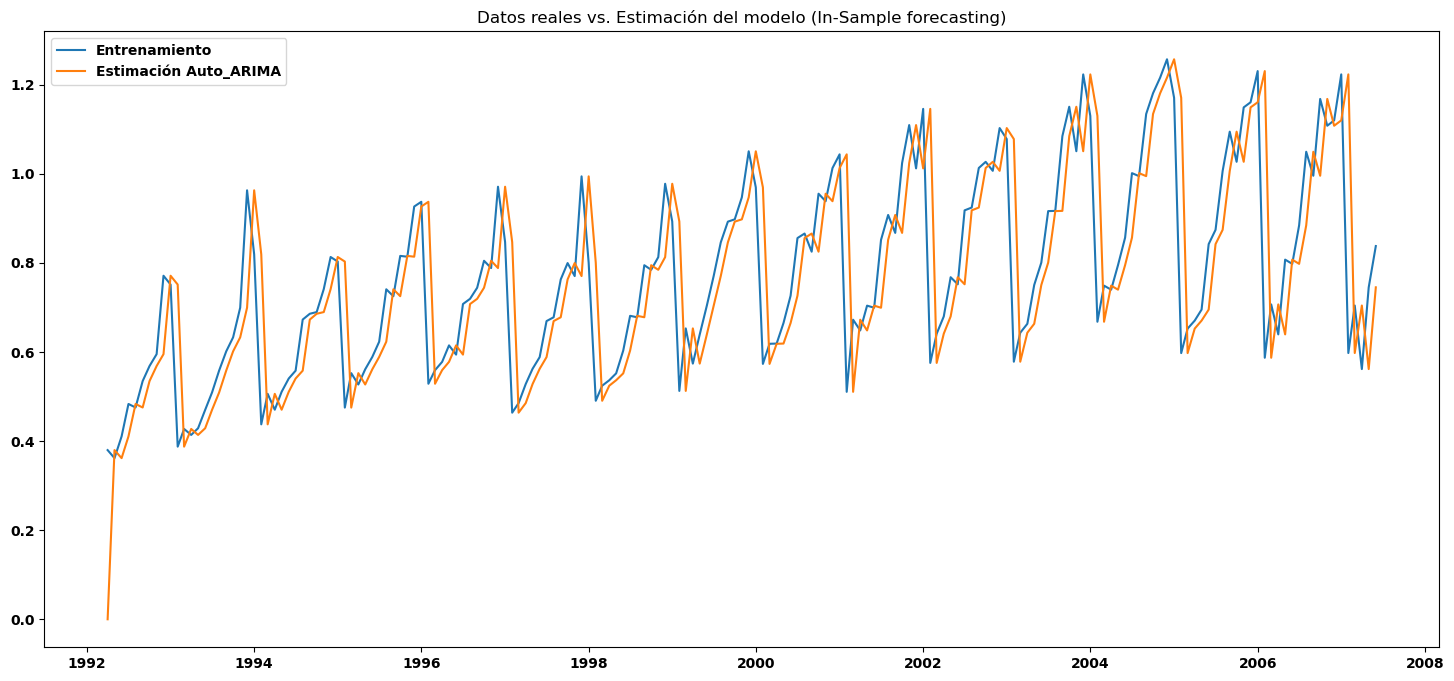

In [29]:
estim_auto_arima = fit_auto_arima.fittedvalues()

plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_auto_arima, label='Estimación Auto_ARIMA')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

In [30]:
pred_auto_arima = fit_auto_arima.predict(horizonte)
pred_auto_arima

2007-07-01    0.837934
2007-08-01    0.837934
2007-09-01    0.837934
2007-10-01    0.837934
2007-11-01    0.837934
2007-12-01    0.837934
2008-01-01    0.837934
2008-02-01    0.837934
2008-03-01    0.837934
2008-04-01    0.837934
2008-05-01    0.837934
2008-06-01    0.837934
Freq: MS, dtype: float64

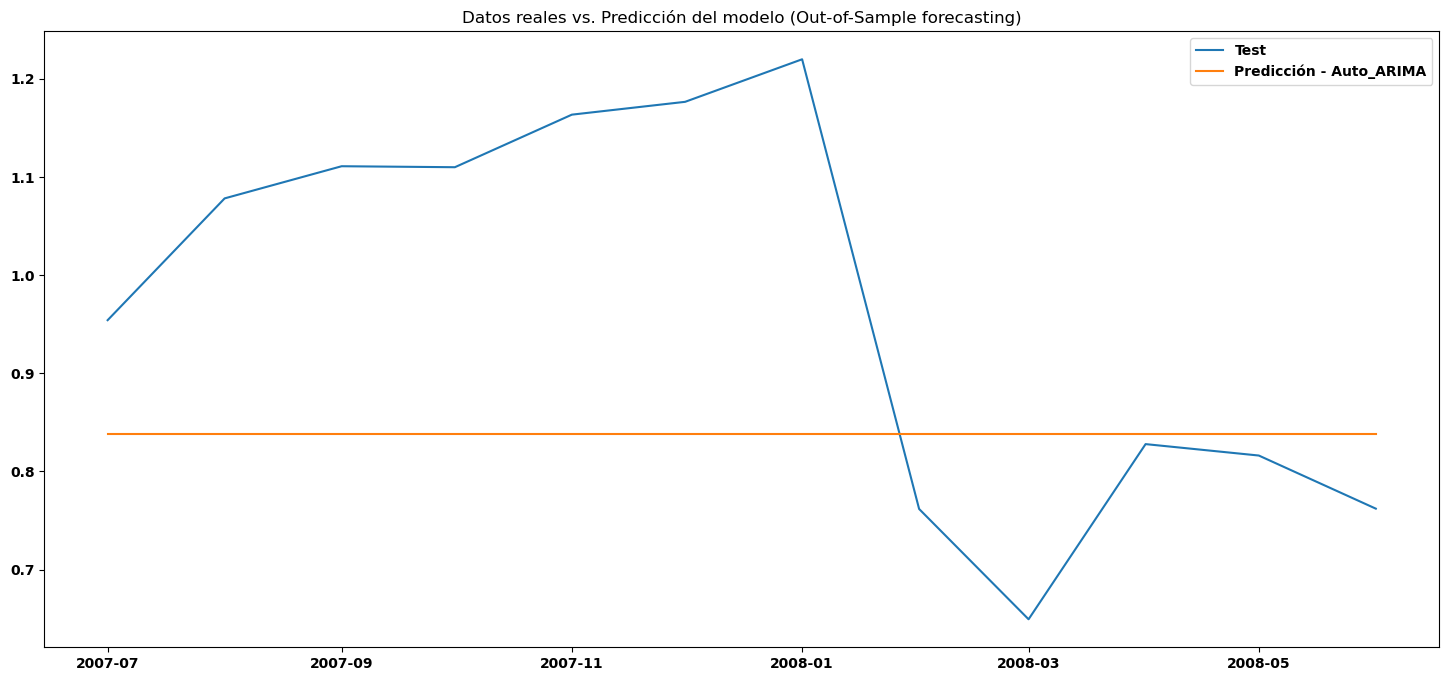

In [31]:
plt.plot(df_test, label='Test')
plt.plot(pred_auto_arima, label='Predicción - Auto_ARIMA')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [32]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_auto_arima))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, pred_auto_arima)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_auto_arima))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_auto_arima)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_auto_arima))

Mean Absolute Error (MAE): 0.19333204500000004
Mean Absolute Percentage Error (MAPE): 18.705151685170364
Mean Squared Error (MSE): 0.052839880397246845
Root Mean Squared Error (RMSE): 0.2298692680574044
R^2 coefficient of determination: -0.4843647041953485


El modelo SARIMAX(0, 1, 0) para la serie temporal muestra un ajuste cercano a los datos históricos pero falla significativamente en la predicción fuera de muestra, con un R² negativo que indica un mal rendimiento predictivo. Los diagnósticos de los residuos sugieren no normalidad y heterocedasticidad, lo que pone en duda la fiabilidad del modelo. Los errores de predicción como el MAE y el RMSE son altos, reforzando la idea de que el modelo no es adecuado para hacer pronósticos precisos con esta serie de datos.

### **`Ejercicio 28.3`**

**`2.3.1`** Construye un modelo de regresión con el método ___`CatBoostRegressor`___ (con sus hiperparámetros por defecto). Al igual que el modelo _AR_ (punto `28.2.2`) introduce el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Posteriormente, calcula las métricas de calidad del modelo **y analiza los resultados obtenidos**:  
- `random_state=77`
- `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

In [33]:
from catboost import CatBoostRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

catboost = ForecasterAutoreg(
    regressor=CatBoostRegressor(random_state=77, silent=True),
    lags=48
)

catboost.fit(y=df_train['venta_h02'])
pred_cat = catboost.predict(steps=horizonte)

print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_cat))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_cat)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_cat))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_cat)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_cat))

Mean Absolute Error (MAE): 0.0696226114195722
Mean Absolute Percentage Error: 7.838613721636127
Mean Squared Error (MSE): 0.006350856380136979
Root Mean Squared Error (RMSE): 0.07969226047827342
R^2 coefficient of determination: 0.8215933309989031


Muestra un rendimiento sólido en la predicción de la serie temporal, con un bajo error medio absoluto y un alto coeficiente de determinación, indicando que las predicciones son precisas y el modelo explica una gran parte de la variabilidad en los datos.

**`28.3.2`** Realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de retrasos, teniendo en cuenta los siguientes puntos:

- Hasta el último retraso estimado en el modelo anterior inclusive (_`p`_)
- Modelo: **CatBoostRegressor**
- `random_state=77`
- `silent=True`

El mejor valor de lags podría ser = 34  que consigue un R2 = 0.8564726331942636


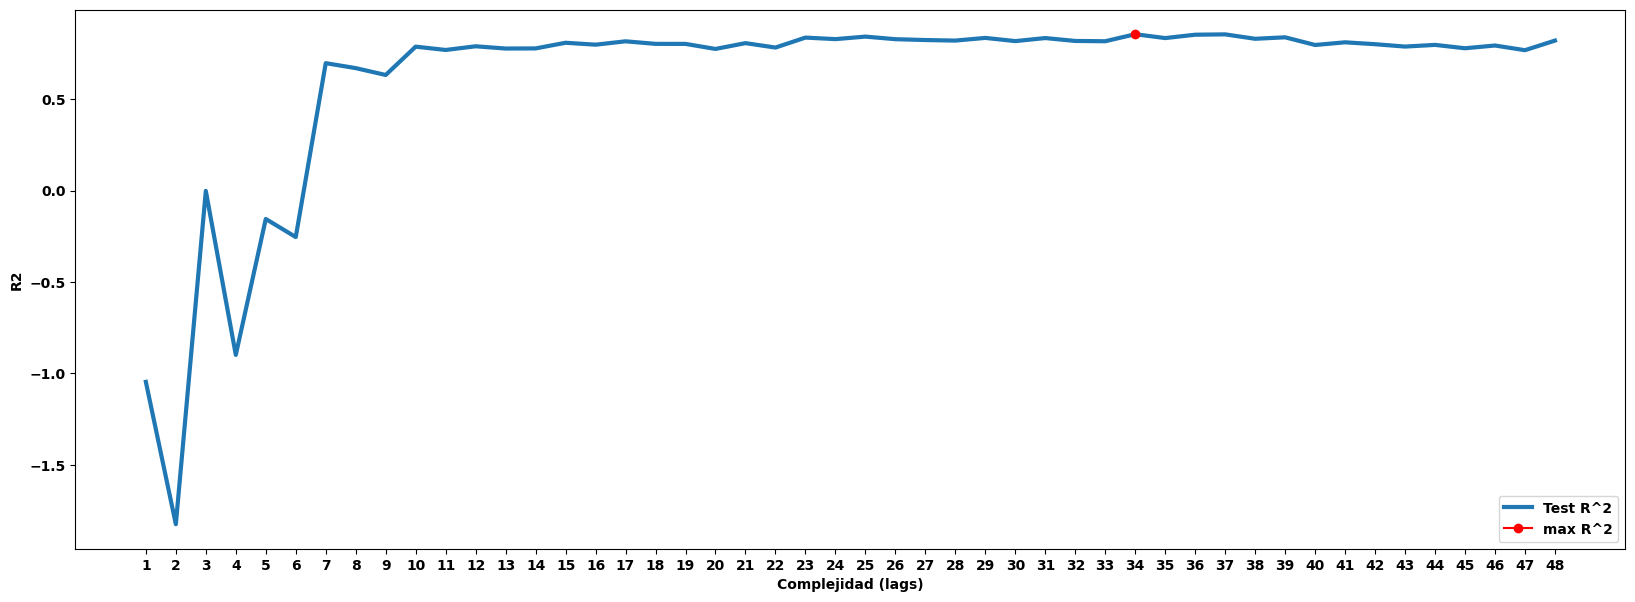

In [34]:
lags_cat = np.arange(1,49)

test_r2_cat = np.zeros(lags_cat.size)

for i in range(lags_cat.size):
    catboost_lag = ForecasterAutoreg(
        regressor=CatBoostRegressor(random_state=77, silent=True),
        lags=int(lags_cat[i])
    )

    catboost_lag.fit(y=df_train['venta_h02'])
    test_r2_cat[i] = r2_score(df_test, catboost_lag.predict(steps=horizonte))

print("El mejor valor de lags podría ser =", lags_cat[np.argmax(test_r2_cat)],
      " que consigue un R2 =", max(test_r2_cat))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(lags_cat, test_r2_cat, linewidth=3, label='Test R^2')
plt.plot(lags_cat[np.argmax(test_r2_cat)], max(test_r2_cat),
        marker='o', color = "red", label="max R^2")
plt.xticks(lags_cat)
plt.xlabel('Complejidad (lags)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

**`28.3.3`** Teniendo en cuenta el valor óptimo calculado en el paso anterior para los retrasos, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de **árboles**.
- inicio: **5** árboles
- fin: **200** árboles inclusive
- con pasos **de 5 en 5**

In [35]:
np.arange(5,205,5)

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200])

El mejor valor de n_estimators podría ser = 100  que consigue un R2 = 0.8824119211239088


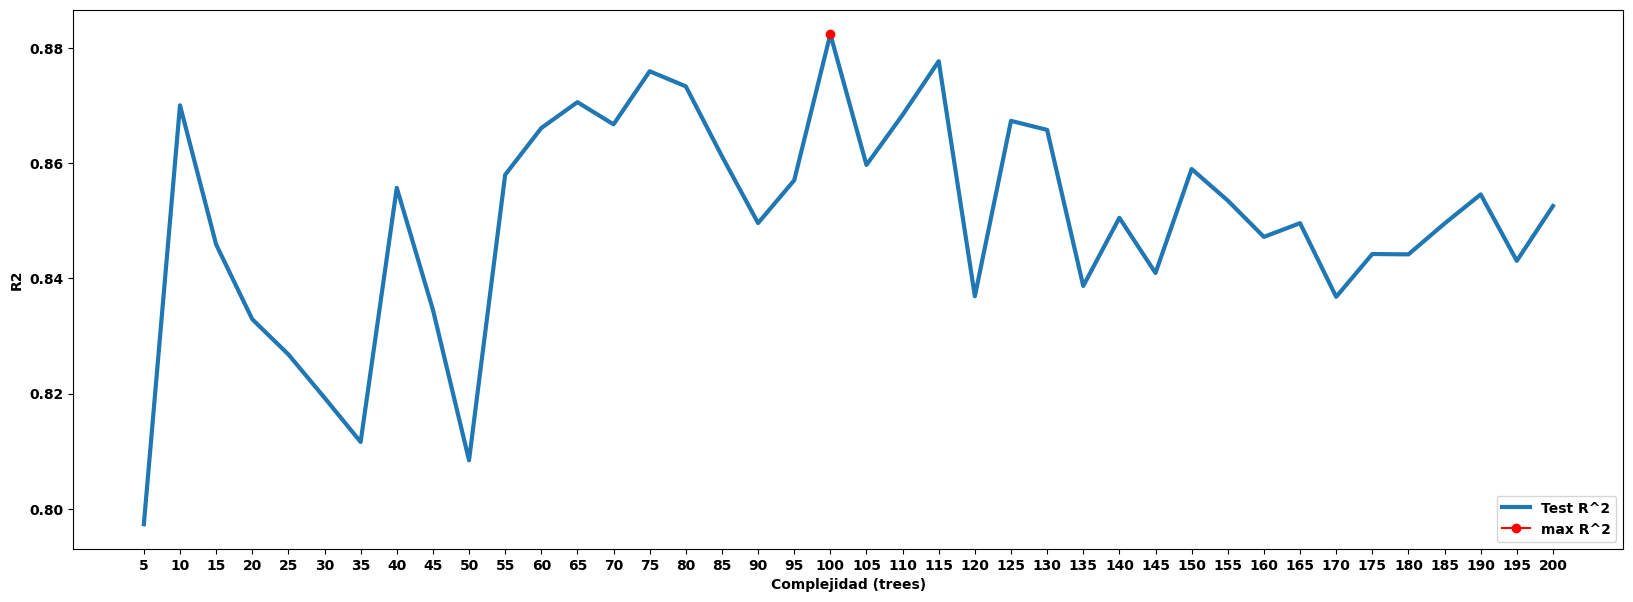

In [36]:
trees_cat = np.arange(5,205,5)

test_r2_trees = np.zeros(trees_cat.size)

for i in range(trees_cat.size):
    catboost_trees = ForecasterAutoreg(
        regressor=CatBoostRegressor(random_state=77, silent=True, n_estimators=trees_cat[i]),
        lags=34
    )

    catboost_trees.fit(y=df_train['venta_h02'])
    test_r2_trees[i] = r2_score(df_test, catboost_trees.predict(steps=horizonte))

print("El mejor valor de n_estimators podría ser =", trees_cat[np.argmax(test_r2_trees)],
      " que consigue un R2 =", max(test_r2_trees))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(trees_cat, test_r2_trees, linewidth=3, label='Test R^2')
plt.plot(trees_cat[np.argmax(test_r2_trees)], max(test_r2_trees),
        marker='o', color = "red", label="max R^2")
plt.xticks(trees_cat)
plt.xlabel('Complejidad (trees)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

**`28.3.4`** Teniendo en cuenta los valores óptimos calculados en los pasos anteriores, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de la **profundidad máxima**.
- Desde **2** hasta **10** no inclusive

El mejor valor de n_estimator podría ser = 6  que consigue un R2 = 0.8824119211239088


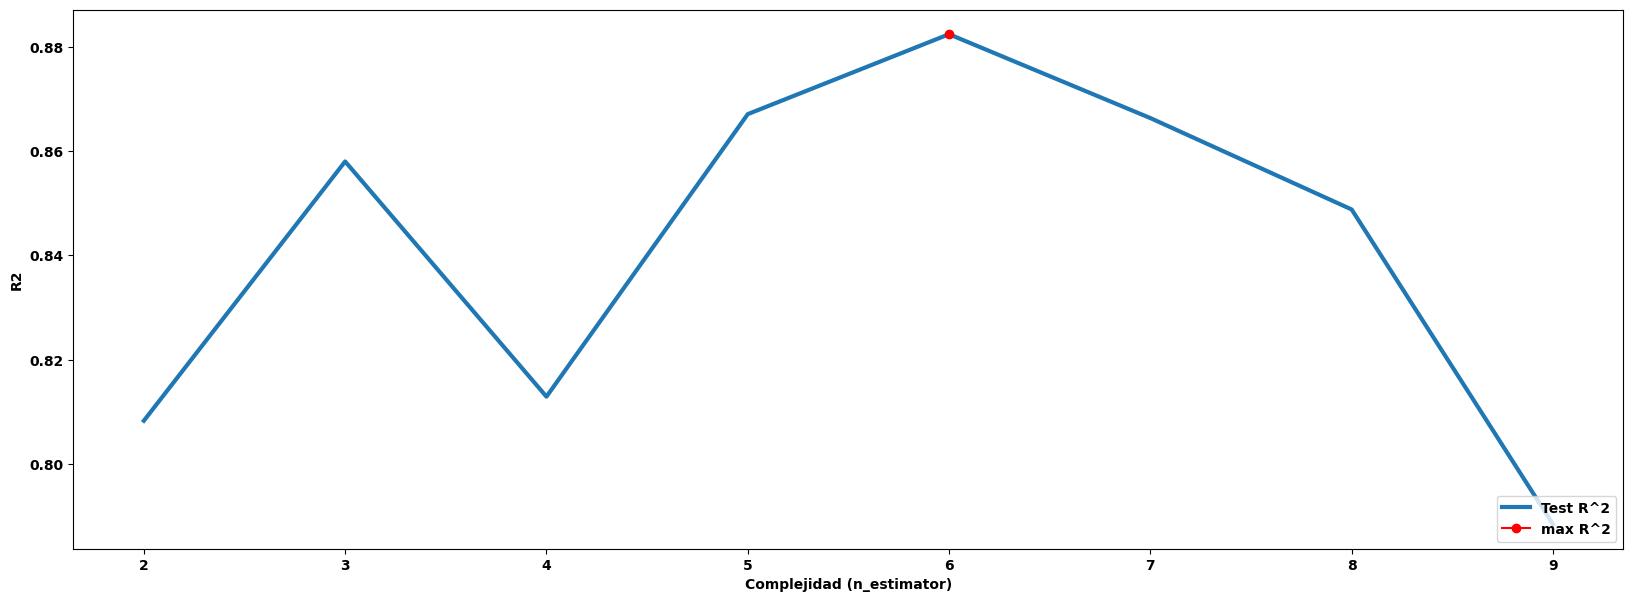

In [37]:
depth_cat = np.arange(2,10)

test_r2_depth = np.zeros(depth_cat.size)

for i in range(depth_cat.size):
    catboost_depth = ForecasterAutoreg(
        regressor=CatBoostRegressor(random_state=77, silent=True, n_estimators=100, max_depth=depth_cat[i]),
        lags=34
    )

    catboost_depth.fit(y=df_train['venta_h02'])
    test_r2_depth[i] = r2_score(df_test, catboost_depth.predict(steps=horizonte))

print("El mejor valor de n_estimator podría ser =", depth_cat[np.argmax(test_r2_depth)],
      " que consigue un R2 =", max(test_r2_depth))

fig = plt.figure(figsize=(20,7))
plt.plot(depth_cat, test_r2_depth, linewidth=3, label='Test R^2')
plt.plot(depth_cat[np.argmax(test_r2_depth)], max(test_r2_depth),
        marker='o', color = "red", label="max R^2")
plt.xticks(depth_cat)
plt.xlabel('Complejidad (n_estimator)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

**`28.3.5`** Construye un modelo con los hiperparámetros óptimos que hayas calculado en los puntos anteriores y calcula las métricas de calidad del modelo y de sus predicciones:

  - `random_state=77`
  - `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

In [38]:
catboost_opt = ForecasterAutoreg(
        regressor=CatBoostRegressor(random_state=77, silent=True, n_estimators=100, max_depth=6),
        lags=34
    )

catboost_opt.fit(y=df_train['venta_h02'])
pred_catboost_opt = catboost_opt.predict(steps=horizonte)

In [39]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_catboost_opt))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_catboost_opt)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_catboost_opt))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_catboost_opt)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_catboost_opt))

Mean Absolute Error (MAE): 0.050373994439311696
Mean Absolute Percentage Error: 5.634489943719529
Mean Squared Error (MSE): 0.00418585810238788
Root Mean Squared Error (RMSE): 0.06469820787616826
R^2 coefficient of determination: 0.8824119211239088


**`28.3.6`** Saca la gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_" y **analiza y compara los resultados** de este modelo con los modelos anteriores.

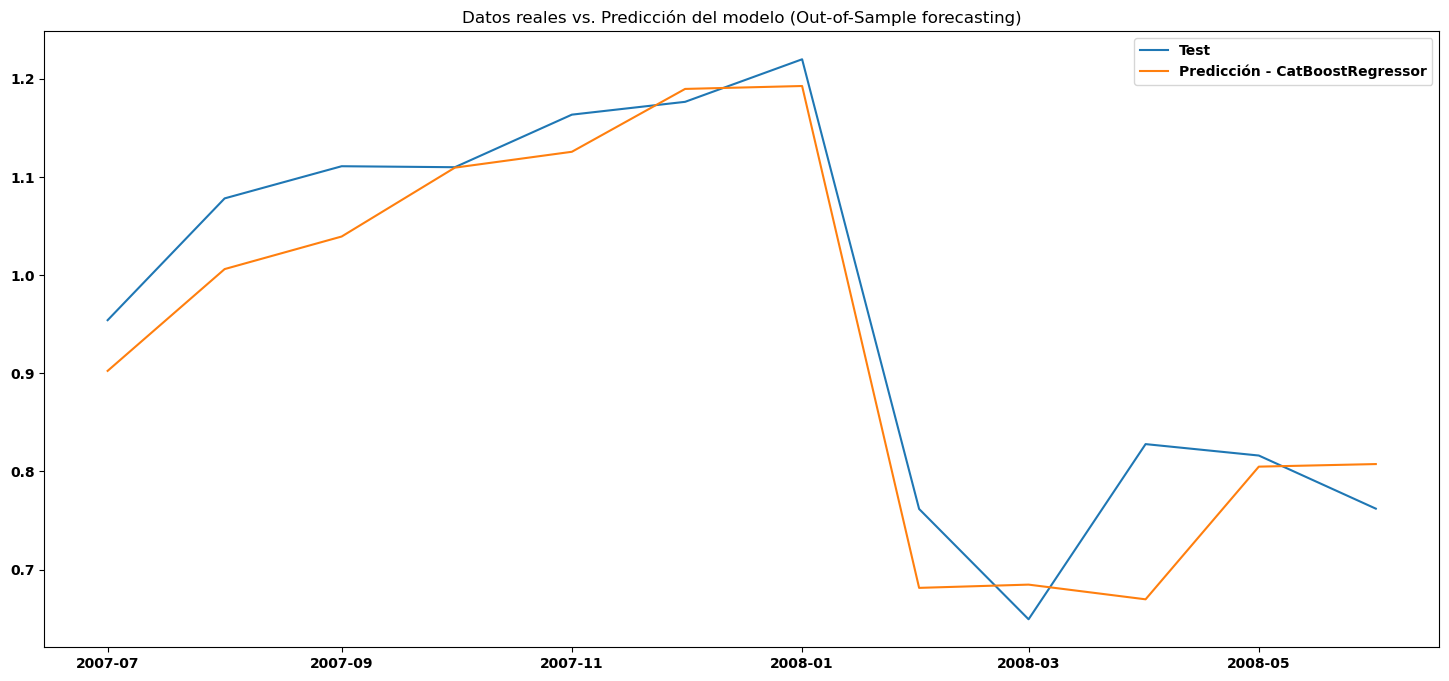

In [40]:
plt.plot(df_test, label='Test')
plt.plot(pred_catboost_opt, label='Predicción - CatBoostRegressor')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

Este modelo CatBoost presenta un rendimiento superior con errores más bajos (MAE y RMSE) y un R² más alto comparado con los modelos anteriores, indicando una precisión y capacidad explicativa mejoradas para la serie temporal. Las predicciones también siguen de cerca a los valores reales en la gráfica fuera de muestra.

**`28.3.7`** Realiza un análisis tipo `In-Sample Model Evaluation` para evaluar la calidad del modelo ajustado mediante siguientes puntos **y explica los resultados obtenidos**:  

- Calcula las estimaciones del modelo ajustado (_`fitted values`_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_" para el periodo de entrenamiento
- Gráfica diagonal de "_Valores reales vs. valors estimados (In-Sample forecasting)_"
- Gráfica de "_Componente residual del modelo (In-Sample fitted errores)_"
- Gráficas de "_Histograma del componente residual (In-sample errors)_"
- Gráfica de la ***Desviación estándar*** y su evolución a lo largo de tiempo para **el componente residual**, considerando una ventana con el tamaño indicado:

   - `win = 12`
- El **correlograma** y la gráfica de **autocorrelación parcial** para **el componente residual** considerando el método con los retrasos indicados:

 - `lags=37`
 - `method='ywm'`
- Gráficas de posibles correlaciones entre **el componente residual** y **los valores relaes y estimados**

In [41]:
X_train, y_train = catboost_opt.create_train_X_y(df_train['venta_h02'])

fitted_values_cat = catboost_opt.regressor.predict(X_train)

In [42]:
fitted_values_cat

array([0.48158063, 0.54534684, 0.53002118, 0.55713659, 0.59129259,
       0.62641665, 0.73393833, 0.73107121, 0.81094998, 0.81546159,
       0.932333  , 0.93607617, 0.5343425 , 0.56371692, 0.57189404,
       0.60643346, 0.59742511, 0.69994638, 0.72408741, 0.75486483,
       0.81076695, 0.78528267, 0.96550675, 0.85499956, 0.46911883,
       0.49789077, 0.53170503, 0.56726238, 0.59061981, 0.67248072,
       0.68076466, 0.75863103, 0.80058458, 0.77945092, 0.9884097 ,
       0.81225402, 0.48927356, 0.5271154 , 0.5454661 , 0.56205069,
       0.60603711, 0.68458279, 0.68907707, 0.79065723, 0.79146324,
       0.81013782, 0.97614964, 0.88657426, 0.51580112, 0.63689897,
       0.56659411, 0.63861015, 0.69168195, 0.76346723, 0.83579173,
       0.87792141, 0.88954747, 0.94030947, 1.03398941, 0.96105151,
       0.56733475, 0.62111974, 0.6147147 , 0.66348521, 0.73311041,
       0.8489031 , 0.85819898, 0.83130978, 0.94972376, 0.94201201,
       1.01613397, 1.03635302, 0.52131295, 0.65696265, 0.64463

In [43]:
fitted_values_cat.size

149

In [44]:
df_train.size

183

 Nota: La longitud de df_train es 183, y tienes 149 valores ajustados <br>
 Entonces, comienza la asignación en el punto 183 - 149 = 34

In [45]:
estim_cat = pd.Series(data=np.zeros(df_train.size), index=df_train.index, name='fitted')
estim_cat[:34] = np.nan
estim_cat[34:] = fitted_values_cat


In [46]:
estim_cat

1992-04-01         NaN
1992-05-01         NaN
1992-06-01         NaN
1992-07-01         NaN
1992-08-01         NaN
                ...   
2007-02-01    0.603684
2007-03-01    0.706847
2007-04-01    0.573064
2007-05-01    0.743036
2007-06-01    0.833638
Freq: MS, Name: fitted, Length: 183, dtype: float64

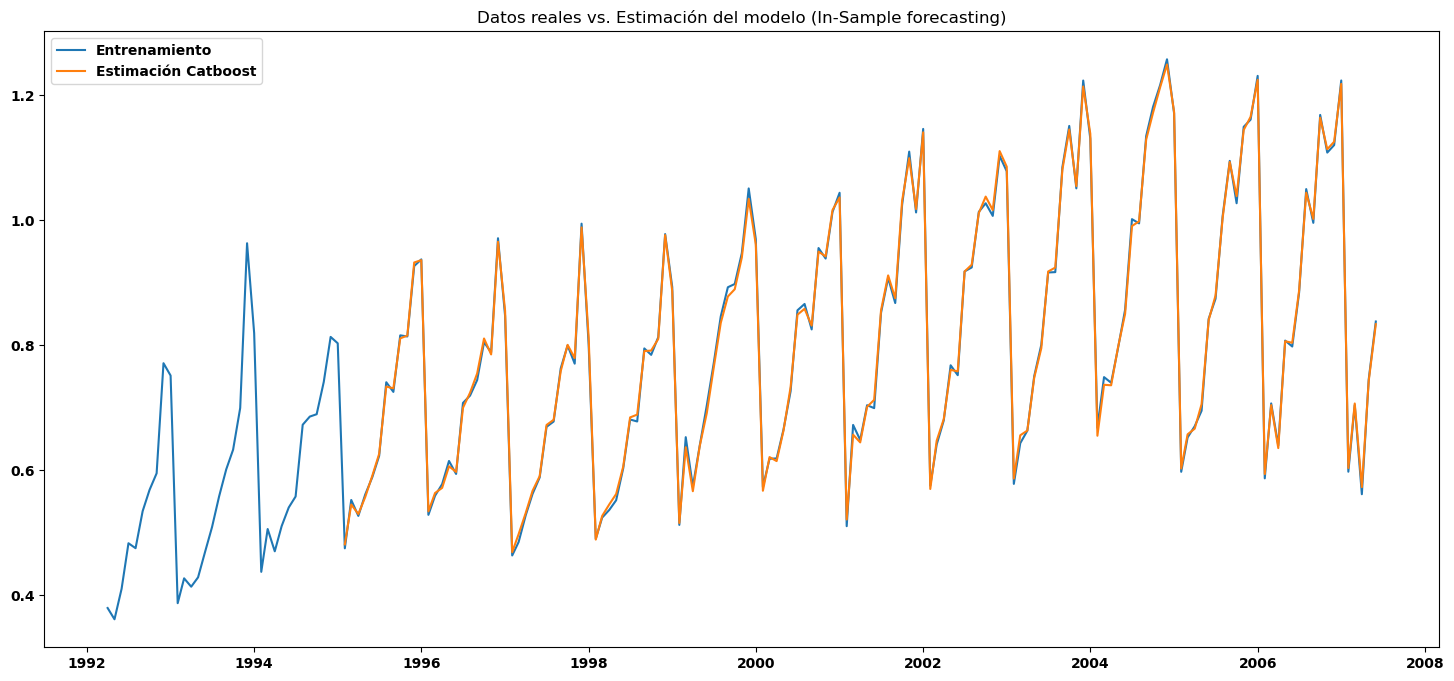

In [47]:
plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_cat, label='Estimación Catboost')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

muestra un ajuste estrecho entre los valores estimados por el modelo CatBoost y los datos reales de entrenamiento, lo que indica un buen ajuste del modelo a los datos históricos

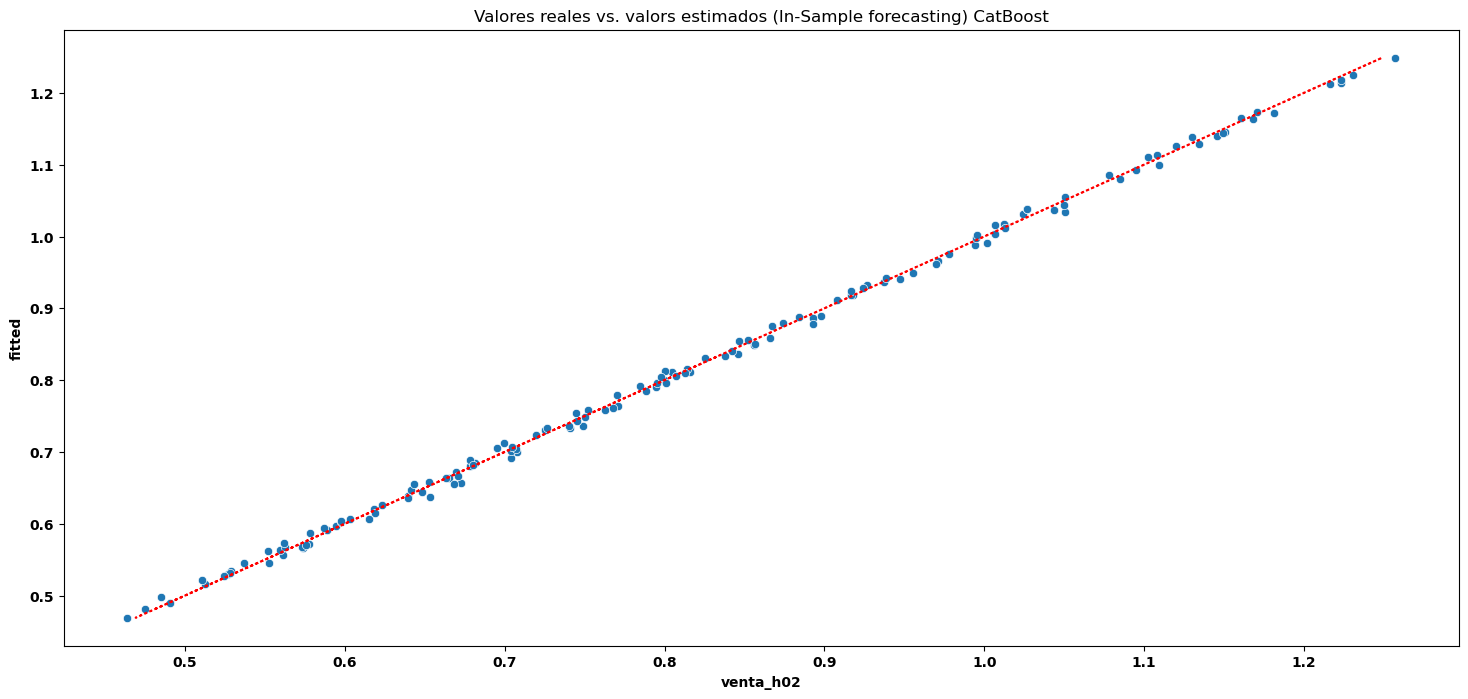

In [48]:
sns.scatterplot(x=df_train['venta_h02'], y=estim_cat)
plt.plot(estim_cat, estim_cat, color='r', linestyle=':')
plt.title("Valores reales vs. valors estimados (In-Sample forecasting) CatBoost")
plt.show()

Los puntos se alinean muy cerca de una línea diagonal, lo cual sugiere que hay una fuerte correlación entre los valores estimados y los reales, confirmando así la precisión del modelo.

In [49]:
resid_cat = df_train['venta_h02']-estim_cat

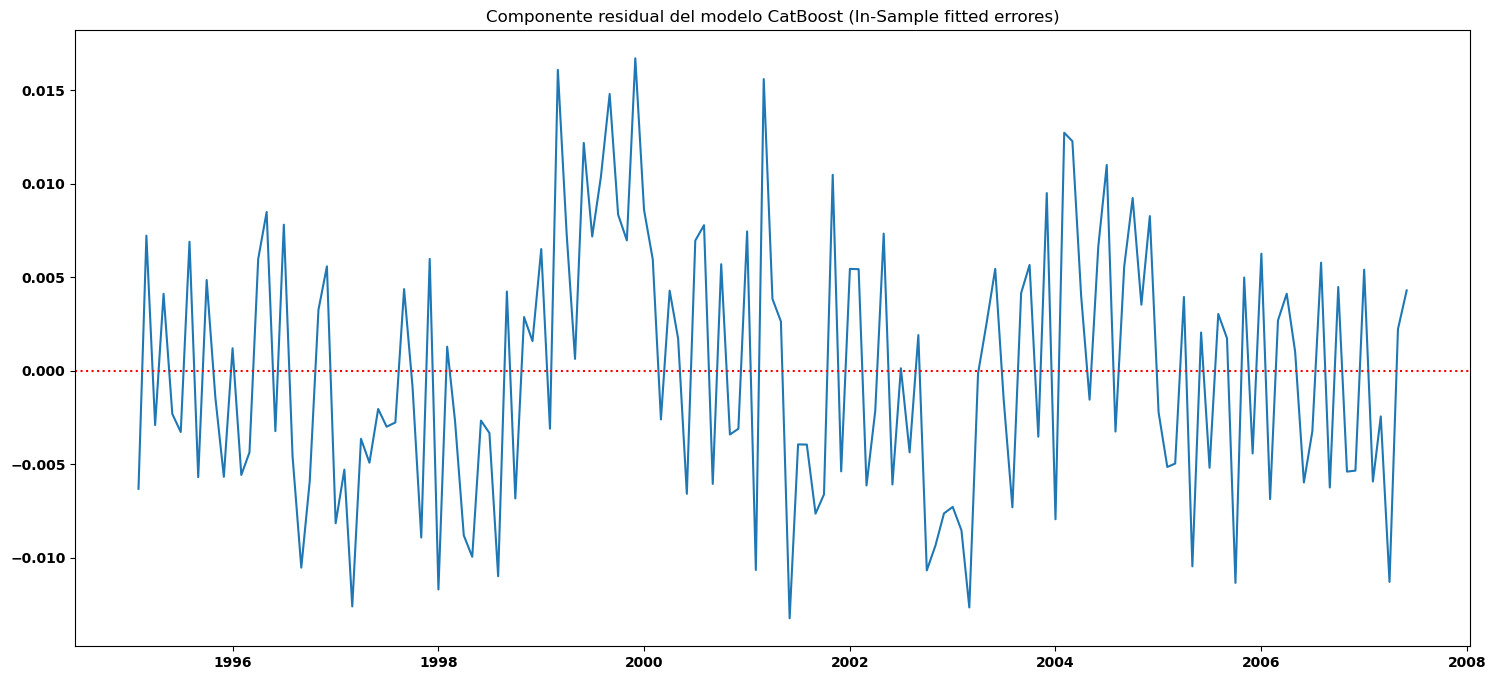

In [50]:
plt.plot(resid_cat)
plt.title("Componente residual del modelo CatBoost (In-Sample fitted errores)")
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

La serie temporal de los residuos parece centrarse alrededor de cero y no muestra patrones claros, lo que es indicativo de un buen ajuste del modelo.

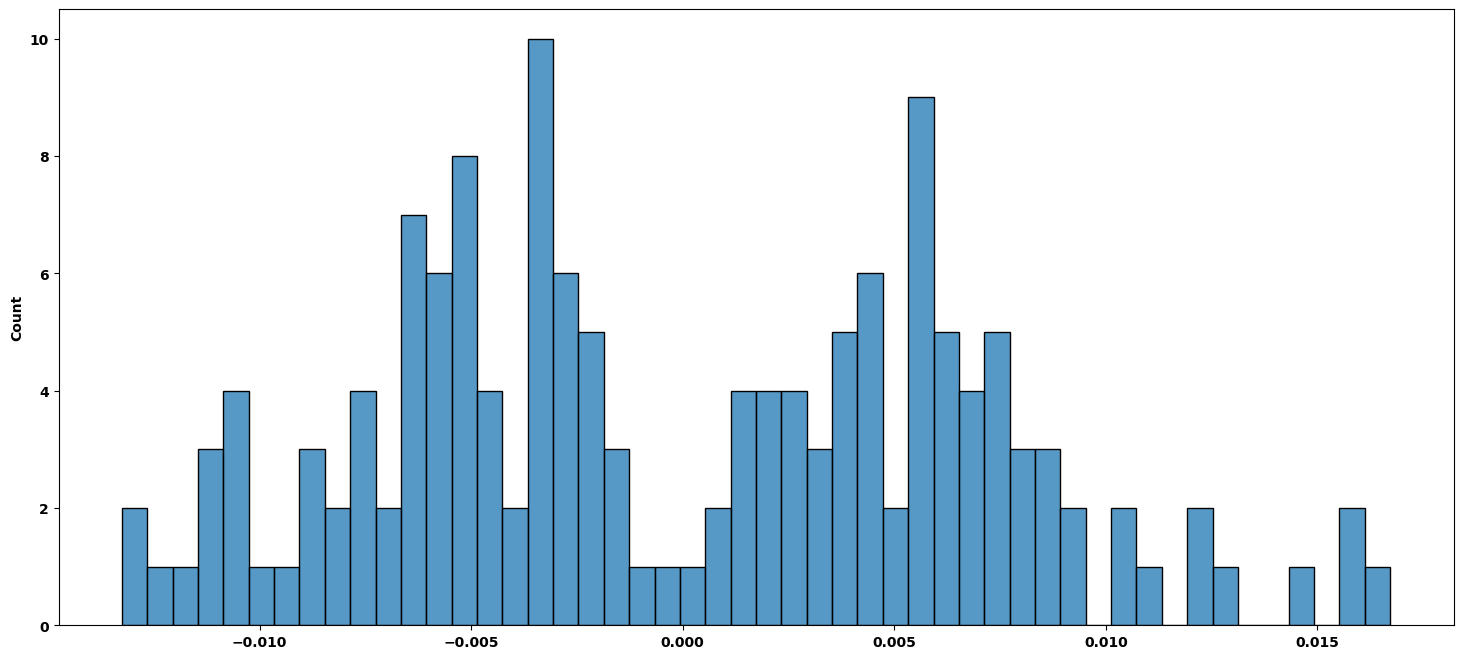

In [51]:
sns.histplot(data=resid_cat, bins=50)
plt.show()

La distribución de los residuos parece bastante simétrica y centrada alrededor de cero, lo que es característico de un modelo bien ajustado.

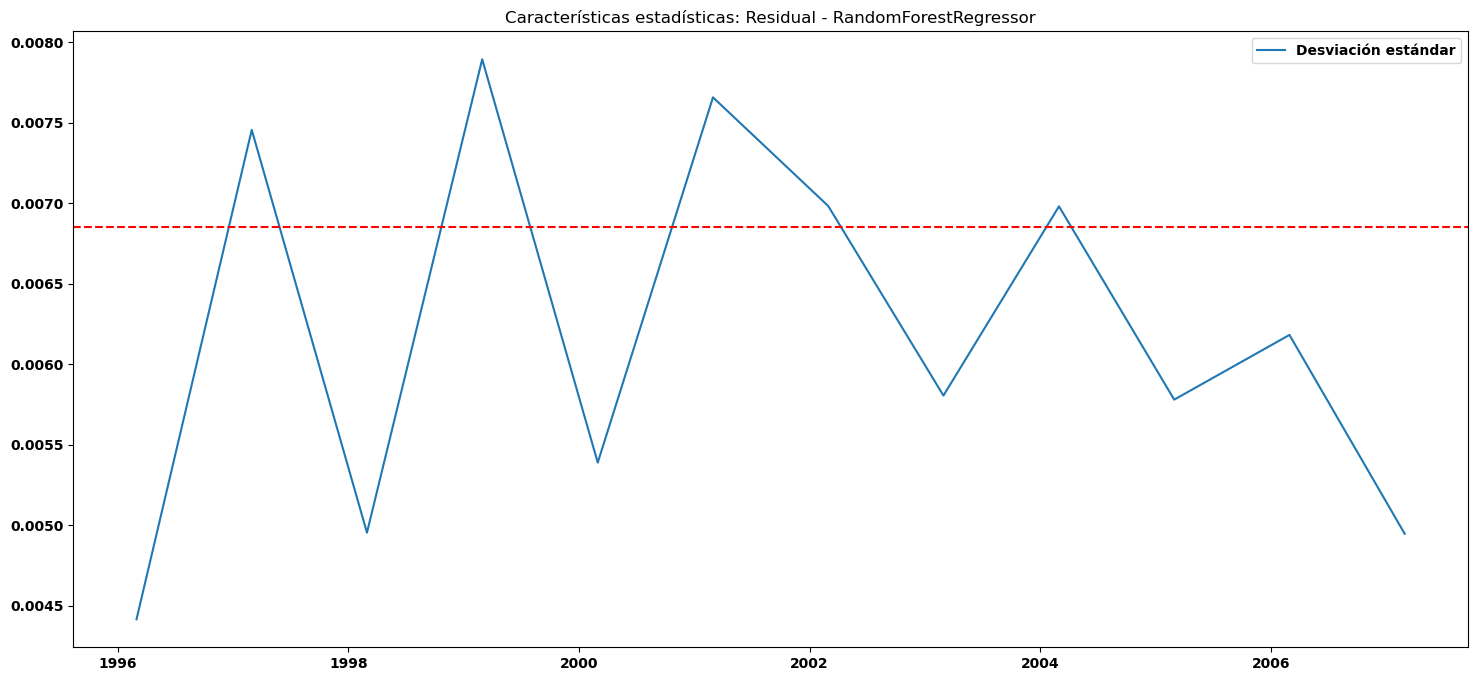

In [52]:
win = 12
resid_cat_std = resid_cat.rolling(win).std().iloc[win-1::win]
plt.plot(resid_cat_std, label='Desviación estándar')
plt.axhline(y=resid_cat.std(), color='r', linestyle='--')
plt.title("Características estadísticas: Residual - RandomForestRegressor")
plt.legend()
plt.show()

La línea está bastante estable, lo que sugiere que la varianza de los residuos es consistente a lo largo del tiempo.

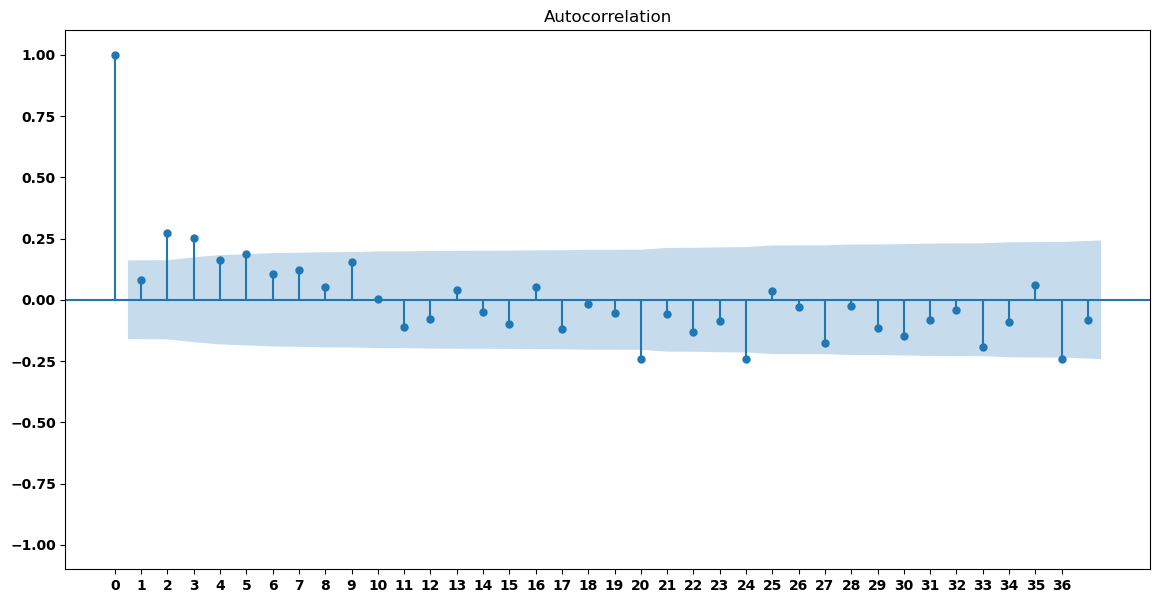

In [53]:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(resid_cat.dropna(), lags=37)
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

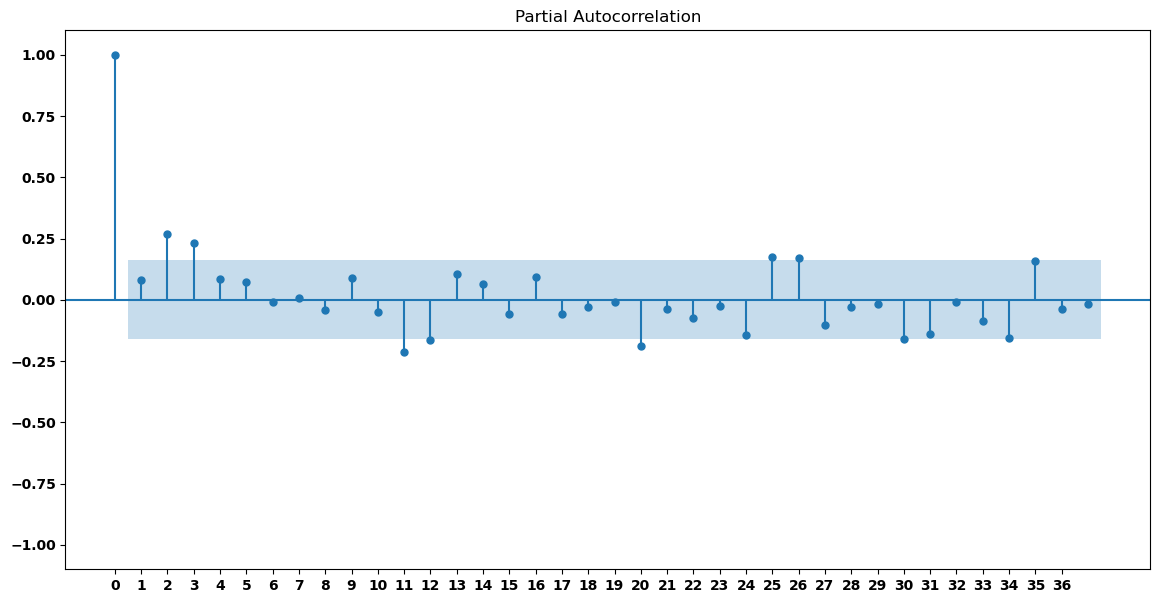

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(resid_cat.dropna(), lags=37, method='ywm')
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

Las gráficas indican que no hay autocorrelaciones significativas en los residuos, lo que implica que el modelo ha capturado bien la estructura de dependencia temporal en los datos.

0.21605232827967144
0.18374190857109857


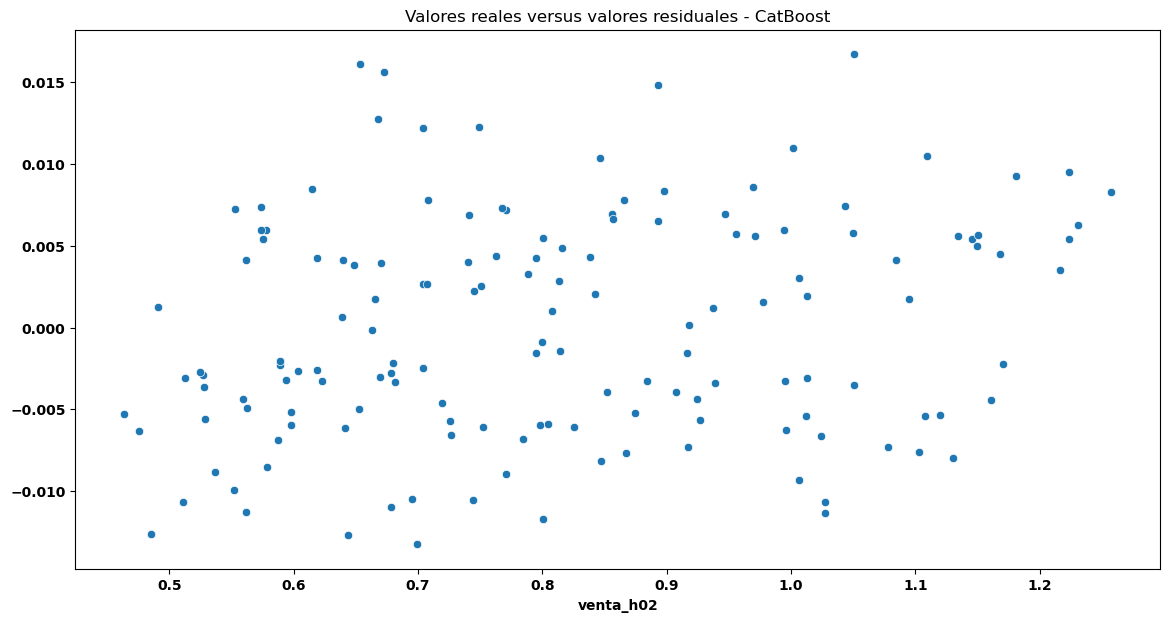

In [55]:
# Analizamos el componente residual

# Coeficiente de correlación entre valores reales y los errores
print(df_train['venta_h02'].corr(resid_cat))

# Coeficiente de correlación entre valores estimados y los errores
print(estim_cat.corr(resid_cat))

sns.scatterplot(x=df_train['venta_h02'], y=resid_cat)
plt.title("Valores reales versus valores residuales - CatBoost")
plt.show()

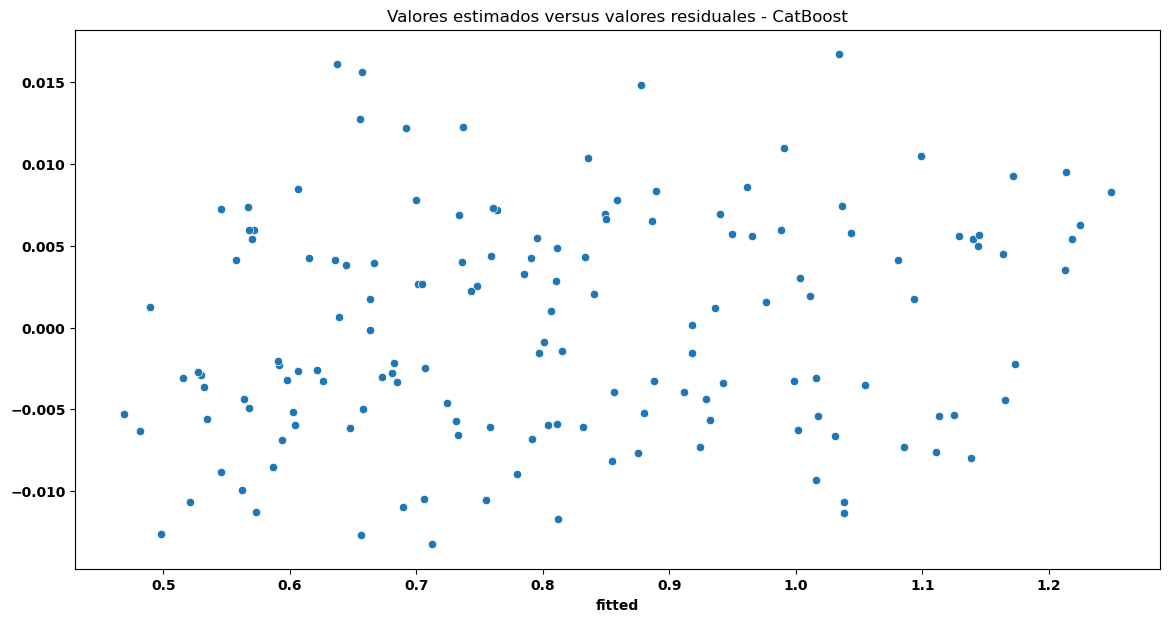

In [56]:
sns.scatterplot(x=estim_cat, y=resid_cat)
plt.title("Valores estimados versus valores residuales - CatBoost")
plt.show()

No se observan patrones distintivos en los gráficos de dispersión de los residuos, lo que respalda la idea de que el modelo ha capturado la mayoría de la información disponible en los datos.

El modelo CatBoost parece proporcionar un ajuste muy bueno para los datos, con un buen nivel de precisión y sin señales claras de problemas en los residuos, lo que sugiere que el modelo puede ser adecuado para la predicción en este conjunto de datos.<br>


**`28.3.8`** Saca la gráfica **interactiva** con el histórico, las predicciones de los modelos desarrollados y los valores reales del último año:

- Predicción del modelo **AR** (`28.2.2`)
- Predicción del modelo **SARIMA** (`28.2.3`)
- Predicción del modelo **CatBoostRegressor** (`28.3.5`)

In [57]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_sn.index,
    y=pred_sn['pred'],
    name="Predicción (Seasonal Naive)",
    mode="markers+lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_ar.index,
    y=pred_ar,
    name="Predicción (AR)",
    mode="markers+lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_auto_arima.index,
    y=pred_auto_arima,
    name="Predicción (AUTO ARIMA)",
    mode="markers+lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_catboost_opt.index,
    y=pred_catboost_opt,
    name="Predicción (CatBoost Optimo)",
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas mensuales de corticosteroides (H02) en Australia",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de $'
                  )

fig.show()

**`28.3.9`** Explica **cuál sería el mejor modelo que elegirías** para esta caso de uso. Además, describe **¿qué tipo de uso podría tener este ejercicio predictivo?** en tu opinión y que sobre todo **para qué fin podría servir las prediciones de estas ventas mensuales.**

El modelo CatBoost supera a todos los modelos Sen términos de precisión de predicción para este conjunto de datos, por lo tanto, sería el modelo que yo elegiría.
Se podría usar perfectamente para planificar la producción, para que el equipo de marketing pueda realizar campañas exitosas dependiendo de cuando estas sean lanzadas y para un analisis financiero o de mercado en el mundo de los corticosteroides en Australia.
El fin último de estas predicciones es aumentar la eficiencia operativa, reducir costos y maximizar beneficios. Al anticipar el futuro con un grado razonable de confianza, una empresa puede tomar decisiones más informadas y estar mejor preparada para los cambios en el mercado.

---